In [1]:
import blur
import matplotlib.pyplot as plt
import os
ba = blur.blurCube()    
    

In [22]:
ba.blur_cubes()
#ba.plot_edge_fwhm()

#print(ba.sigma_values)


path: hico_data/downloaded_data/H2009349090039.L1B_ISS.nc
path: hico_data/downloaded_data/H2009339143952.L1B_ISS.nc
path: hico_data/downloaded_data/H2009336071540.L1B_ISS.nc
path: hico_data/downloaded_data/H2009322052444.L1B_ISS.nc
path: hico_data/downloaded_data/H2009321214730.L1B_ISS.nc
path: hico_data/downloaded_data/H2009317202215.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294141216.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294063909.L1B_ISS.nc
path: hico_data/downloaded_data/H2009293152420.L1B_ISS.nc
path: hico_data/downloaded_data/H2010353143500.L1B_ISS.nc
path: hico_data/downloaded_data/H2010348080207.L1B_ISS.nc
path: hico_data/downloaded_data/H2010346033159.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339004143.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339155831.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338153839.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338015025.L1B_ISS.nc
path: hico_data/downloaded_data/H2010317173241.L1B_ISS.nc
path: hico_dat

In [21]:

ba.get_cubes()
cubes = []  # List to store all cubes
for path in ba.paths_to_nc:
    ba.path_to_nc = path
    print("path:", path)
    ba.read_cube()
    cubes.append(ba.cube)  # Store the cube in the list



path: hico_data/downloaded_data/H2009349090039.L1B_ISS.nc
path: hico_data/downloaded_data/H2009339143952.L1B_ISS.nc
path: hico_data/downloaded_data/H2009336071540.L1B_ISS.nc
path: hico_data/downloaded_data/H2009322052444.L1B_ISS.nc
path: hico_data/downloaded_data/H2009321214730.L1B_ISS.nc
path: hico_data/downloaded_data/H2009317202215.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294141216.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294063909.L1B_ISS.nc
path: hico_data/downloaded_data/H2009293152420.L1B_ISS.nc
path: hico_data/downloaded_data/H2010353143500.L1B_ISS.nc
path: hico_data/downloaded_data/H2010348080207.L1B_ISS.nc
path: hico_data/downloaded_data/H2010346033159.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339004143.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339155831.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338153839.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338015025.L1B_ISS.nc
path: hico_data/downloaded_data/H2010317173241.L1B_ISS.nc
path: hico_dat

In [3]:
paths = ['/home/kimado/master/HYPSO-1/hico_data/ref_data/edge_image.nc', '/home/kimado/master/HYPSO-1/hico_data/ref_data/H2010154045937.L1B_ISS.nc', '/home/kimado/master/HYPSO-1/hico_data/ref_data/H2010026150016.L1B_ISS.nc']

ba.blur_cubes_classic(paths)

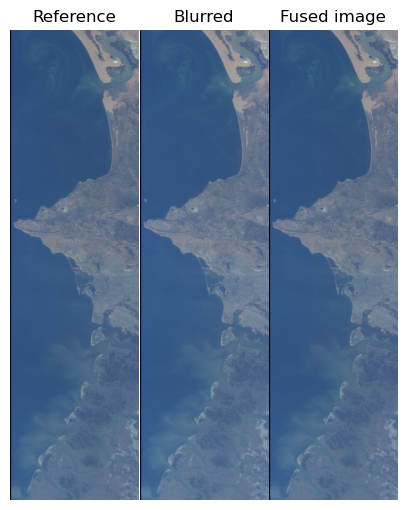

In [36]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec

def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val)


def combine_patches_blured(parent_folder, key):
    patches = []
    for folder_name in os.listdir(parent_folder):
        image_folder = os.path.join(parent_folder, folder_name)
        for file in os.listdir(image_folder):
            file_path = os.path.join(image_folder, file)
            if file_path.endswith('.mat'):
                patch = sio.loadmat(file_path)[key]
                patch_rgb = patch[:, :, [33, 18, 2]]
                patches.append(patch_rgb)

    patches = np.array(patches).reshape((11, 3, *patch_rgb.shape))
    image = np.concatenate(np.concatenate(patches, axis=1), axis=1)
    image = normalize_image(image)

    return image

def combine_patches(image_paths, patch_key_prefix):
    patches = []

    data = sio.loadmat(image_paths)
    for i in range(1, 34):  # Assuming there are 33 patches
        patch_key = f"{patch_key_prefix}_{str(i).zfill(2)}_pred"
        if patch_key in data:
            patch = data[patch_key]
            patch_rgb = patch[:, :, [33, 18, 2]]  # Assuming these are the R, G, B channels
            patches.append(patch_rgb)

    patches = np.array(patches).reshape((11, 3, *patch_rgb.shape))
    image = np.concatenate(np.concatenate(patches, axis=1), axis=1)
    image = normalize_image(image)

    return image


def show(image, position, title):
    ax = plt.subplot(gs[position])
    ax.axis('off')
    ax.imshow(image)
    ax.set_title(title)

image_paths = '/home/kimado/master/DIP-HyperKite/Experiments/DHP_DARN/hico_dataset/N_modules_2/final_prediction.mat'
paths = '/home/kimado/master/DIP-HyperKite/datasets/hico/edge_image.nc'
image = combine_patches(image_paths, 'edge_image.nc')
ref = combine_patches_blured(paths, 'ref')
blurred = combine_patches_blured(paths, 'blurred')

fig = plt.figure(figsize=(5, 15))  # Adjust the size as needed
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.01)

show(image, 2, 'Fused image')
show(ref, 0, 'Reference')
show(blurred, 1, 'Blurred')

plt.savefig('/home/kimado/master/HYPSO-1/fig/edge.pdf', format='pdf', bbox_inches='tight')  # Save the figure as a PDF
plt.show()


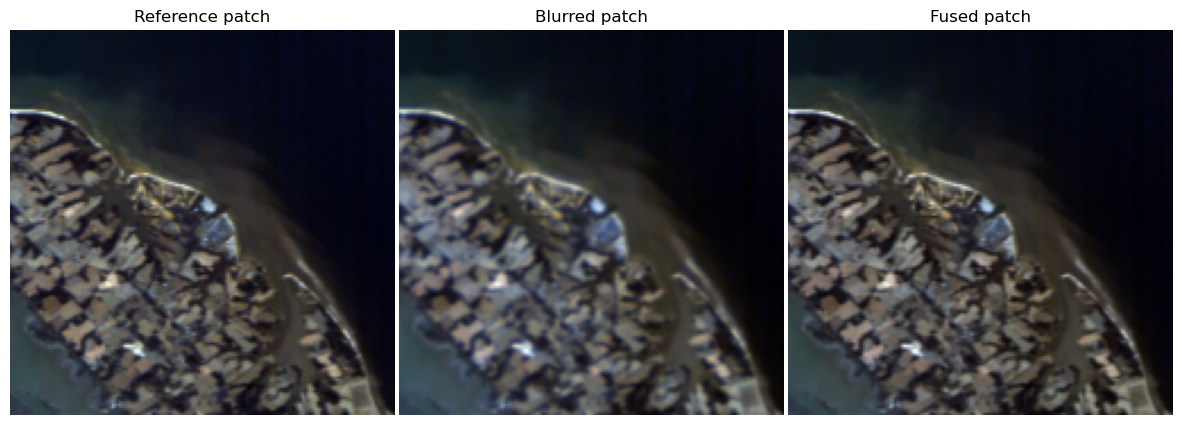

In [48]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val)


def visualize_cube(blurred_cube_path,fusion_string):
    """
    fusion_result = sio.loadmat(fusion_result_path)
    image = fusion_result['H2010086172605.L1B_ISS.nc_01_pred'].transpose()
    print(fusion_result.keys())
    """
    blurred_image = sio.loadmat(blurred_cube_path)['blurred']
    image = sio.loadmat(blurred_cube_path)['ref']
    sharpest_image = sio.loadmat(blurred_cube_path)['sharpest_image']
    final_fusion = sio.loadmat(fusion_result_path)[fusion_string]
    #max_value = np.max(blurred_image)
    #print(f"The maximum value in the blurred_image is {max_value}")
    blurred_image = normalize_image(blurred_image)
    image = normalize_image(image)
    sharpest_image = normalize_image(sharpest_image)
    final_fusion = normalize_image(final_fusion)
    #qnr_values = qnr(sharpest_image, blurred_image, final_fusion)
    #print("QNR Value 1: ", qnr_values[0])
    #print("Lambda: ", qnr_values[1])
    #print("D_sr: ", qnr_values[2])
        
    R_f = image[:, :, 42-9]
    G_f = image[:, :, 27-9]
    B_f = image[:, :, 11-9]
    
    R = blurred_image[:, :, 42-9]
    G = blurred_image[:, :, 27-9]
    B = blurred_image[:, :, 11-9]

    Fus_r = final_fusion[:, :, 42-9]
    Fus_g = final_fusion[:, :, 27-9]
    Fus_b = final_fusion[:, :, 11-9]
    
    R_f = (R_f - R_f.min()) / (R_f.max() - R_f.min())
    G_f = (G_f - G_f.min()) / (G_f.max() - G_f.min())
    B_f = (B_f - B_f.min()) / (B_f.max() - B_f.min())
    
    R = (R - R.min()) / (R.max() - R.min())
    G = (G - G.min()) / (G.max() - G.min())
    B = (B - B.min()) / (B.max() - B.min())

    Fus_r = (Fus_r - Fus_r.min()) / (Fus_r.max() - Fus_r.min())
    Fus_g = (Fus_g - Fus_g.min()) / (Fus_g.max() - Fus_g.min())
    Fus_b = (Fus_b - Fus_b.min()) / (Fus_b.max() - Fus_b.min())


    fus_image = np.dstack((Fus_r, Fus_g, Fus_b))
    reference_image = np.dstack((R_f, G_f, B_f))
    blurred_image_stack = np.dstack((R, G, B))

    # Create a figure with 2 subplots
    plt.figure(figsize=(15, 5))

    # Display the rgb_image in the first subplot
    plt.subplot(1, 3, 1)
    plt.imshow(reference_image)
    plt.title('Reference patch')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image_stack)
    plt.title('Blurred patch')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fus_image)
    plt.title('Fused patch')
    plt.axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    
    # New code to plot histograms
    #plt.figure(figsize=(15, 5))

    """
    # Plot the histogram of the reference image
    plt.subplot(1, 3, 1)
    plt.hist(reference_image.ravel(), bins=256, color='red', alpha=0.5)
    plt.title('Histogram of Reference Image')

    # Plot the histogram of the blurred image
    plt.subplot(1, 3, 2)
    plt.hist(blurred_image_stack.ravel(), bins=256, color='green', alpha=0.5)
    plt.title('Histogram of Blurred Image')

    # Plot the histogram of the fusion result
    plt.subplot(1, 3, 3)
    plt.hist(fus_image.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram of Fusion Result')
    """

    plt.show()
filename = 'H2010026150016.L1B_ISS.nc_11'
path = os.path.join('/home/kimado/master/DIP-HyperKite/datasets/hico', filename[:-3], filename, filename + '.mat')
fusion_result_path = '/home/kimado/master/DIP-HyperKite/Experiments/DHP_DARN/hico_dataset/N_modules_2/final_prediction.mat'
fus_string = 'H2010026150016.L1B_ISS.nc_11_pred'
visualize_cube(path, fus_string)

In [ ]:
filename = 'H2010165063512.L1B_ISS.nc_13'
path = os.path.join('/home/kimado/master/DIP-HyperKite/datasets/hico', filename[:-3], filename, filename + '.mat')

In [49]:
for path, cube in zip(ba.paths_to_nc, cubes):
    # Convert to RGB
    rgb_cube = cube[:, :, [33, 18, 2]]  # Assuming these are the R, G, B channels

    # Normalize to [0, 1]
    rgb_cube = (rgb_cube - rgb_cube.min()) / (rgb_cube.max() - rgb_cube.min())

    # Display the RGB image
    plt.imshow(rgb_cube)
    plt.title(os.path.basename(path))  # Set the title to the filename
    plt.axis('off')
    plt.show()

NameError: name 'ba' is not defined

In [50]:
import os
for path in ba.paths_to_nc:
    for i in range(1, 34):
        print(os.path.basename(path) + "_" + str(i).zfill(2))

NameError: name 'ba' is not defined

In [6]:
from scipy.ndimage import uniform_filter
import numpy as np
import warnings
from scipy.ndimage import generic_filter
from math import ceil

def _uqi_single(GT,P,ws):
	N = ws**2
	window = np.ones((ws,ws))

	GT_sq = GT*GT
	P_sq = P*P
	GT_P = GT*P

	GT_sum = uniform_filter(GT, ws)    
	P_sum =  uniform_filter(P, ws)     
	GT_sq_sum = uniform_filter(GT_sq, ws)  
	P_sq_sum = uniform_filter(P_sq, ws)  
	GT_P_sum = uniform_filter(GT_P, ws)

	GT_P_sum_mul = GT_sum*P_sum
	GT_P_sum_sq_sum_mul = GT_sum*GT_sum + P_sum*P_sum
	numerator = 4*(N*GT_P_sum - GT_P_sum_mul)*GT_P_sum_mul
	denominator1 = N*(GT_sq_sum + P_sq_sum) - GT_P_sum_sq_sum_mul
	denominator = denominator1*GT_P_sum_sq_sum_mul

	q_map = np.ones(denominator.shape)
	index = np.logical_and((denominator1 == 0) , (GT_P_sum_sq_sum_mul != 0))
	q_map[index] = 2*GT_P_sum_mul[index]/GT_P_sum_sq_sum_mul[index]
	index = (denominator != 0)
	q_map[index] = numerator[index]/denominator[index]

	s = int(np.round(ws/2))
	return np.mean(q_map[s:-s,s:-s])

def uqi (GT,P,ws=2):
	"""calculates universal image quality index (uqi).

	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).

	:returns:  float -- uqi value.
	"""
	GT,P = _initial_check(GT,P)
	return np.mean([_uqi_single(GT[:,:,i],P[:,:,i],ws) for i in range(GT.shape[2])])

def _initial_check(GT,P):
	assert GT.shape == P.shape, "Supplied images have different sizes " + \
	str(GT.shape) + " and " + str(P.shape)
	if GT.dtype != P.dtype:
		msg = "Supplied images have different dtypes " + \
			str(GT.dtype) + " and " + str(P.dtype)
		warnings.warn(msg)
	

	if len(GT.shape) == 2:
		GT = GT[:,:,np.newaxis]
		P = P[:,:,np.newaxis]

	return GT,P

def d_lambda (ms,fused,p=1):
	"""calculates Spectral Distortion Index (D_lambda).

	:param ms: low resolution multispectral image.
	:param fused: high resolution fused image.
	:param p: parameter to emphasize large spectral differences (default = 1).

	:returns:  float -- D_lambda.
	"""
	L = ms.shape[2]

	M1 = np.ones((L,L))
	M2 = np.ones((L,L))

	for l in range(L):
		for r in range(l+1,L):
			M1[l,r] = M1[r,l] = uqi(fused[:,:,l],fused[:,:,r])
			M2[l,r] = M2[r,l] = uqi(ms[:,:,l],ms[:,:,r])

	diff = np.abs(M1 - M2)**p
	return (1./(L*(L-1)) * np.sum(diff))**(1./p)

def d_s_r(I_F, I_PAN, S=32):
    # Multivariate linear regression between fused MS and original PAN
    _, _, CD, _, _ = lsr(I_F, I_PAN, S)
    
    # Spatial distortion index
    Ds_R_index = 1 - CD
    
    return Ds_R_index

def lsr(I_F, I_PAN, S=32):
    # Vectorization of PAN and fused MS
    IHc = I_PAN.flatten()
    ILRc = I_F.reshape(-1, I_F.shape[2])

    # Multivariate linear regression
    w, _, _, _ = np.linalg.lstsq(ILRc, IHc, rcond=None)
    alpha = np.expand_dims(np.expand_dims(w, axis=0), axis=0)

    # Fitted Least squares intensity
    I_R = np.sum(I_F * np.tile(alpha, (I_F.shape[0], I_F.shape[1], 1)), axis=2)

    # Space-varying least squares error
    err_reg = I_PAN.flatten() - I_R.flatten()

    # Regression residual value
    res = np.sqrt(np.mean(err_reg**2))

    # Coefficient of determination
    cd = 1 - (np.var(err_reg) / np.var(I_PAN.flatten()))

    # Variance of PAN
    var_pan = np.var(I_PAN.flatten())

    return w, res, cd, var_pan, err_reg


def qnr (pan,ms,fused,alpha=1,beta=1,p=1,q=1):
	"""calculates Quality with No Reference (QNR).

	:param pan: high resolution panchromatic image.
	:param ms: low resolution multispectral image.
	:param fused: high resolution fused image.
	:param alpha: emphasizes relevance of spectral distortions to the overall.
	:param beta: emphasizes relevance of spatial distortions to the overall.
	:param p: parameter to emphasize large spectral differences (default = 1).
	:param q: parameter to emphasize large spatial differences (default = 1).
	:param r: ratio of high resolution to low resolution (default=4).
	:param ws: sliding window size (default = 7).

	:returns:  float -- QNR.
	"""
	lam = d_lambda(ms,fused,p=p)
	a = (1-lam)**alpha
	dsr = d_s_r(fused, pan)
	b = (1-dsr)**beta
	return a*b, lam, dsr

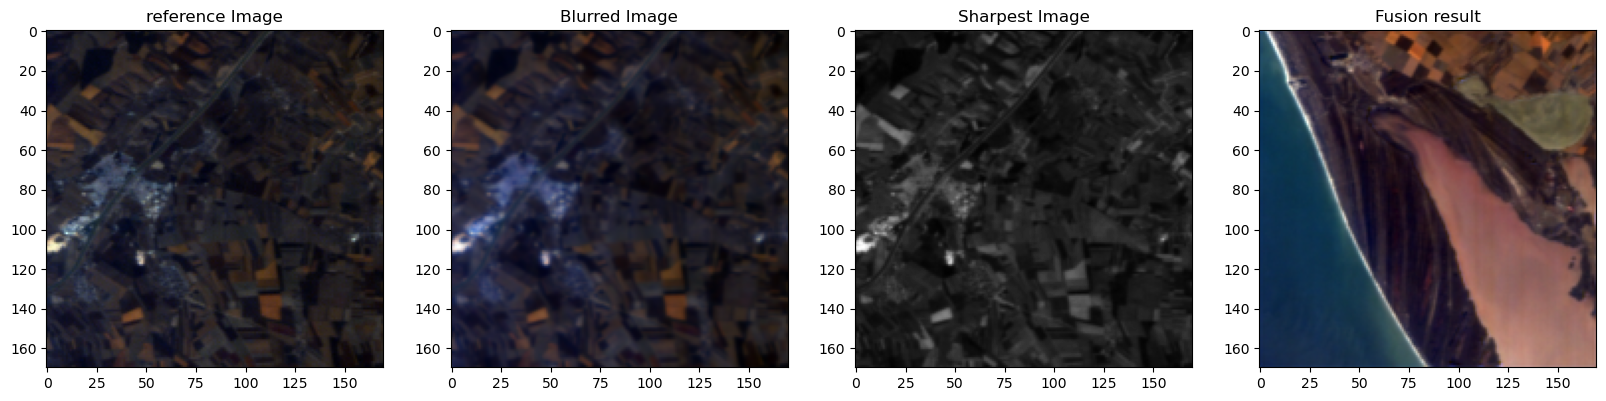

In [50]:
fusion_result_path = '/home/kimado/master/DIP-HyperKite/Experiments/kitenetwithsk/hico_dataset/N_modules_3/final_prediction.mat'
blurred_cube_path = '/home/kimado/master/DIP-HyperKite/datasets/hico/H2010154045937.L1B_ISS.nc/H2010154045937.L1B_ISS.nc_14/H2010154045937.L1B_ISS.nc_14.mat'

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import sys

def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val)


def visualize_cube():
    """
    fusion_result = sio.loadmat(fusion_result_path)
    image = fusion_result['H2010086172605.L1B_ISS.nc_01_pred'].transpose()
    print(fusion_result.keys())
    """
    final_fusion = sio.loadmat(fusion_result_path)['H2010154045937.L1B_ISS.nc_14_pred']
    blurred_image = sio.loadmat(blurred_cube_path)['blurred']
    image = sio.loadmat(blurred_cube_path)['ref']
    sharpest_image = sio.loadmat(blurred_cube_path)['sharpest_image']

    #max_value = np.max(blurred_image)
    #print(f"The maximum value in the blurred_image is {max_value}")
    blurred_image = normalize_image(blurred_image)
    image = normalize_image(image)
    sharpest_image = normalize_image(sharpest_image)
    final_fusion = normalize_image(final_fusion)
    #qnr_values = qnr(sharpest_image, blurred_image, final_fusion)
    
        
    R_f = image[:, :, 42-9]
    G_f = image[:, :, 27-9]
    B_f = image[:, :, 11-9]
    
    R = blurred_image[:, :, 42-9]
    G = blurred_image[:, :, 27-9]
    B = blurred_image[:, :, 11-9]

    Fus_r = final_fusion[:, :, 42-9]
    Fus_g = final_fusion[:, :, 27-9]
    Fus_b = final_fusion[:, :, 11-9]
    
    R_f = (R_f - R_f.min()) / (R_f.max() - R_f.min())
    G_f = (G_f - G_f.min()) / (G_f.max() - G_f.min())
    B_f = (B_f - B_f.min()) / (B_f.max() - B_f.min())
    
    R = (R - R.min()) / (R.max() - R.min())
    G = (G - G.min()) / (G.max() - G.min())
    B = (B - B.min()) / (B.max() - B.min())

    Fus_r = (Fus_r - Fus_r.min()) / (Fus_r.max() - Fus_r.min())
    Fus_g = (Fus_g - Fus_g.min()) / (Fus_g.max() - Fus_g.min())
    Fus_b = (Fus_b - Fus_b.min()) / (Fus_b.max() - Fus_b.min())


    fus_image = np.dstack((Fus_r, Fus_g, Fus_b))
    reference_image = np.dstack((R_f, G_f, B_f))
    blurred_image_stack = np.dstack((R, G, B))

    # Create a figure with 2 subplots
    plt.figure(figsize=(20, 5))

    # Display the rgb_image in the first subplot
    plt.subplot(1, 4, 1)
    plt.imshow(reference_image)
    plt.title('reference Image')

    plt.subplot(1, 4, 2)
    plt.imshow(blurred_image_stack)
    plt.title('Blurred Image')

    plt.subplot(1, 4, 3)
    plt.imshow(sharpest_image, cmap='gray')
    plt.title('Sharpest Image')

    plt.subplot(1, 4, 4)
    plt.imshow(fus_image)
    plt.title('Fusion result')
    """
    # New code to plot histograms
    plt.figure(figsize=(15, 5))

    # Plot the histogram of the reference image
    plt.subplot(1, 3, 1)
    plt.hist(reference_image.ravel(), bins=256, color='red', alpha=0.5)
    plt.title('Histogram of Reference Image')

    # Plot the histogram of the blurred image
    plt.subplot(1, 3, 2)
    plt.hist(blurred_image_stack.ravel(), bins=256, color='green', alpha=0.5)
    plt.title('Histogram of Blurred Image')

    # Plot the histogram of the fusion result
    plt.subplot(1, 3, 3)
    plt.hist(fus_image.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram of Fusion Result')
    """

    plt.show()

visualize_cube()

In [ ]:
import cv2
import os
import xarray as xr

cube = ba.read_cube()
patch_size = 170
path = '/home/kimado/master/HYPSO-1/hico_data/downloaded_data/edge_image.nc'
filefolder = "/home/kimado/master/DIP-HyperKite/datasets/hico"

def blur_cube():

    final_sigma =  [1.2071679687499999, 1.1487695312499997, 1.11373046875, 1.06701171875, 1.0436523437499998, 1.0086132812499997, 0.9735742187499998, 0.95021484375, 0.9268554687499999, 0.88013671875, 0.86845703125, 0.8450976562499999, 0.82173828125, 0.7866992187499999, 0.73998046875, 0.73998046875, 0.73998046875, 0.6932617187499999, 0.65822265625, 0.6348632812499999, 0.6231835937499999, 0.6115039062500001, 0.59982421875, 0.57646484375, 0.5647851562499999, 0.5531054687499999, 0.5414257812500001, 0.52974609375, 0.51806640625, 0.50638671875, 0.49470703124999993, 0.48302734375, 0.47134765624999997, 0.47134765624999997, 0.47134765624999997, 0.45966796874999993, 0.43630859375, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.41294921875, 0.41294921875, 0.42462890624999994, 0.41294921875, 0.42462890624999994, 0.42462890624999994, 0.43630859375, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.44798828125, 0.45966796874999993, 0.47134765624999997, 0.47134765624999997, 0.47134765624999997, 0.48302734375, 0.49470703124999993, 0.51806640625, 0.51806640625, 0.5414257812500001, 0.5531054687499999, 0.5647851562499999, 0.58814453125, 0.6115039062500001, 0.64654296875, 0.65822265625, 0.68158203125, 0.7049414062499999, 0.72830078125, 0.7633398437499999, 0.7750195312499999, 0.81005859375, 0.8334179687499998, 0.8567773437499999, 0.89181640625, 0.9151757812499999, 0.95021484375, 0.9852539062499999, 1.0086132812499997, 1.0436523437499998, 1.06701171875, 1.10205078125, 1.1370898437499997, 1.1721289062499998, 1.2071679687499999]

    blurred_cube = np.zeros_like(cube)

    for i in range(cube.shape[2]):
        blurred_cube[:,:,i] = cv2.GaussianBlur(cube[:,:,i], (0,0), sigmaX=final_sigma[i])

    divide_into_patches(blurred_cube)

def read_cube():
    #f = nc.Dataset(self.path_to_nc, 'r')
    #ds = xr.open_dataset(self.path_to_nc, group='products', engine='h5netcdf', phony_dims='access')

    ds = xr.open_dataset(path, group='products', engine='h5netcdf')
    Lt = ds['Lt']

    slope = 0.02  # The slope value mentioned in the documentation
    Lt_corrected = Lt * slope
    
    cube = Lt_corrected[:1870, :510, 9:96].values # to make the patches work

    return cube

def divide_into_patches(blurred_cube):
    """
        Divide the blurred cube into patches of size patch_size.
    """
    from scipy.io import savemat

    ref = cube

    sharpest_image = blurred_cube[:,:,44]

    count = 1
    for i in range(0, blurred_cube.shape[0], patch_size):
        for j in range(0, blurred_cube.shape[1], patch_size):

            blurred_patch = blurred_cube[i:i+patch_size, j:j+patch_size, :]
            ref_patch = ref[i:i+patch_size, j:j+patch_size, :]
            sharpest_image_patch = sharpest_image[i:i+patch_size, j:j+patch_size]
            
            # Create a folder for each patch
            base_name = os.path.basename(path)
            folder_name = f'{base_name}_{str(count).zfill(2)}'
            file_folder = os.path.join(filefolder, base_name)
            file_name = os.path.join(file_folder, folder_name)
            if not os.path.exists(file_name):
                os.makedirs(file_name)
            
            savemat(os.path.join(file_name, f'{folder_name}.mat'), {'ref': ref_patch, 'blurred': blurred_patch, 'sharpest_image': sharpest_image_patch})                
            count += 1

blur_cube()


In [ ]:
import cv2
print(cv2.__version__)